In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.interchange.dataframe_protocol import DataFrame

1. Is there a company that has no difference between the Open and Close 
columns? What does it mean from the financial point of view for the stock (you 
can get bonus partial points)?

In [4]:
AON = pd.read_csv("AON.csv")
MS = pd.read_csv("MS.csv")
PSA = pd.read_csv("PSA.csv")
UNP = pd.read_csv("UNP.csv")

In [6]:
firms = ["AON", "MS", "PSA", "UNP"]

In [12]:
print("AON " + str(AON["Open"].sum() - AON["Close"].sum()))
print("MS " + str(MS["Open"].sum() - MS["Close"].sum()))
print("PSA " + str(PSA["Open"].sum() - PSA["Close"].sum()))
print("UNP " + str(UNP["Open"].sum() - UNP["Close"].sum()))

AON -93.88399999996182
MS 7.091000000000349
PSA 28.597999999998137
UNP -16.88300000000163


All firms have a difference, it means the change of value of stocks

2. What is the highest and lowest price (Close) each company recorded? 


In [16]:
print("AON min: " + str(AON["Close"].min()) +" max: "+ str(AON["Close"].max()))
print("MS " + str(MS["Close"].min()) +" max: "+ str(MS["Close"].max()))
print("PSA " + str(PSA["Close"].min()) +" max: "+ str(PSA["Close"].max()))
print("UNP " + str(UNP["Close"].min()) +" max: "+ str(UNP["Close"].max()))

AON min: 103.481 max: 326.51
MS 23.816 max: 98.243
PSA 132.484 max: 368.156
UNP 86.221 max: 260.918


3.  Calculate logarithmic returns from Close. For each company report on 
its, min, man, mean, median of the return distribution.

In [21]:
AON['lrAON'] = np.log(AON['Close'] / AON['Close'].shift(1))
MS['lrMS'] = np.log(MS['Close'] / MS['Close'].shift(1))
PSA['lrPSA'] = np.log(PSA['Close'] / PSA['Close'].shift(1))
UNP['lrUNP'] = np.log(UNP['Close'] / UNP['Close'].shift(1))




In [24]:
lrs = pd.DataFrame([AON['lrAON'],MS['lrMS'], PSA['lrPSA'],UNP['lrUNP']]).T

In [35]:
for i in range(4):
    a = lrs.iloc[:, i]
    print(lrs.columns[i]+" min:" + str(a.min()))
    print(lrs.columns[i]+" max:" + str(a.max()))
    print(lrs.columns[i]+" mean:" + str(a.mean()))
    print(lrs.columns[i]+" median:" + str(a.median()))
    print(" ")


lrAON min:-0.18275802270452535
lrAON max:0.13218844070774197
lrAON mean:0.000691665216454588
lrAON median:0.001256755223852679
 
lrMS min:-0.16957385941519132
lrMS max:0.18040522759448127
lrMS mean:0.000555418035925942
lrMS median:0.0004527063427908464
 
lrPSA min:-0.12251802774940553
lrPSA max:0.06167431774326661
lrPSA mean:0.000309500253552541
lrPSA median:0.0009565362407365197
 
lrUNP min:-0.1396580677957621
lrUNP max:0.12225152145044878
lrUNP mean:0.0005508848373292112
lrUNP median:0.0010723419323386881
 


4. When did each company record the highest gain and highest loss for the day?

In [38]:
AON

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,lrAON,lrMS,lrPSA,lrUNP
0,2017-01-03,104.034,104.322,103.431,104.025,839000,0.0,0.0,NaN,NaN,NaN,NaN
1,2017-01-04,104.350,105.380,104.127,105.167,962400,0.0,0.0,0.010918,0.013146,0.007306,0.006036
2,2017-01-05,104.851,105.399,104.238,105.324,792300,0.0,0.0,0.001492,-0.009202,0.010602,-0.009845
3,2017-01-06,105.779,106.587,105.389,106.132,642000,0.0,0.0,0.007642,0.014475,0.003469,0.010327
4,2017-01-09,105.723,106.048,105.250,105.250,727100,0.0,0.0,-0.008345,-0.026356,-0.006854,-0.007489
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,294.491,297.385,293.537,295.849,430000,0.0,0.0,0.001465,-0.003009,0.011434,0.005974
1506,2022-12-27,296.066,297.670,294.836,296.223,338900,0.0,0.0,0.001263,-0.012265,-0.000600,0.001954
1507,2022-12-28,296.962,297.867,294.600,294.787,384700,0.0,0.0,-0.004859,-0.007087,-0.018002,-0.016543
1508,2022-12-29,297.208,299.737,293.861,298.595,404600,0.0,0.0,0.012835,0.009199,0.016375,0.011298


In [40]:
AON.resample('W-MON', label="left")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [41]:
sap = pd.read_csv("companies_no_subindustry.csv")

1. Find out how many companies do not filled-in the date of inclusion (column
“included”) to S&P 500. 

In [47]:
sap[sap["included"].isna()].shape[0]

45

2. Delete the companies with no inclusion date and calculate which company is
the oldest/youngest constituent and tell us the average age of a constituent in
the sample. If you need to fix anything or make any assumptions, comment on
them in the code.

In [57]:
dpd = sap.dropna()
#Newest
dpd[dpd["included"] == dpd["included"].max()]["Symbol"]

3    ABBV
Name: Symbol, dtype: object

In [58]:
#Oldest
dpd[dpd["included"] == dpd["included"].min()]["Symbol"]

163    EMN
Name: Symbol, dtype: object

In [60]:
dpd["converted"] = dpd.to_datetime(dpd.included).values.astype(np.int64)


AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [69]:
pd.to_datetime(dpd.included, format="mixed")

DateParseError: Unknown datetime string format, unable to parse: 1983-11-30 (1957-03-04), at position 51

In [65]:
dpd["new"] = dpd.included.to_datetime(dpd.included, format="%d-%m-%Y")

AttributeError: 'Series' object has no attribute 'to_datetime'

3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like
this)


In [75]:
sectors = dpd.groupby('GICS_Sector').first().index.to_list()
scts = pd.DataFrame([], columns=sectors)

In [80]:
dpd.groupby('GICS_Sector').agg({"GICS_Sector": ["unique"]}).reset_index()
    

GICS_Sector                          
                                              unique
0   Communication Services  [Communication Services]
1   Consumer Discretionary  [Consumer Discretionary]
2         Consumer Staples        [Consumer Staples]
3                   Energy                  [Energy]
4               Financials              [Financials]
5              Health Care             [Health Care]
6              Industrials             [Industrials]
7   Information Technology  [Information Technology]
8                Materials               [Materials]
9              Real Estate             [Real Estate]
10               Utilities               [Utilities]

In [83]:
s_n = []
for sec in sectors:
    s_n.append(dpd['GICS_Sector'].value_counts().get(sec, 0))

array([<Axes: ylabel='0'>], dtype=object)

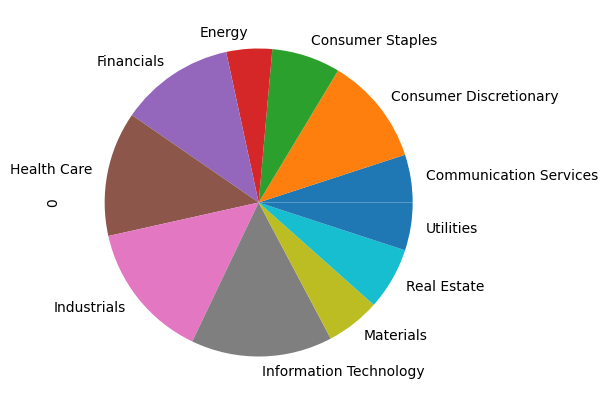

In [105]:
sectors_df = pd.DataFrame(s_n, index=sectors)
sectors_df.plot.pie(figsize=(10, 5), subplots=True, legend=False)

4. Parse the “hq” column, extract the state of the hq and describe the distribution
of the states 


In [81]:
dpd["hq"]

0        Saint Paul, Minnesota
1         Milwaukee, Wisconsin
2      North Chicago, Illinois
3      North Chicago, Illinois
4       Danvers, Massachusetts
                ...           
498       Louisville, Kentucky
499     Lincolnshire, Illinois
500            Warsaw, Indiana
501       Salt Lake City, Utah
502     Parsippany, New Jersey
Name: hq, Length: 458, dtype: object